In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import codecs

# Preparación de datos sobre BitCoin

## Carga de JSON con historial de datos de Bitcoin

In [2]:
df = pd.DataFrame
df = pd.read_json("/home/ernesteins/Documentos/python/yaselga-moreira-ernesto-daniel/proyectoFinal/BtcHw/recolectado/BtcRegistros.json")

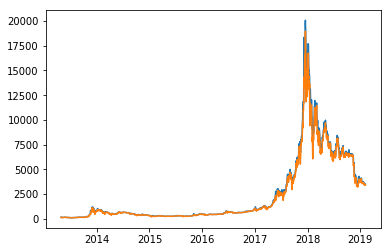

In [3]:
plt.plot(df['date'],df['high'],
         df['date'],df['low'])

## Limitamos el rango a los años 2017/01 - 2018/12

In [4]:
df20162018 = df[df['date'] <= '2019-01-01']
df20162018 = df20162018['2017-01-01' <= df20162018['date']]

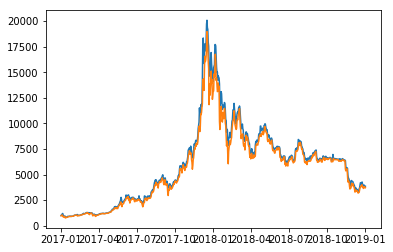

In [5]:
plt.plot(df20162018['date'],df20162018['high'],
         df20162018['date'],df20162018['low'])

## Limitamos el rngo a la épica más caótica del bit coin la cual fue entre Noviembre de 2017 y mayo de 2018


In [6]:
dfjunaug=df20162018[df20162018['date']<='2018-05-01']
dfjunaug=dfjunaug['2017-11-01' <= dfjunaug['date']]

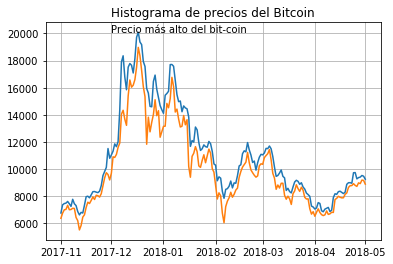

In [7]:
plt.title("Histograma de precios del Bitcoin")
plt.plot(dfjunaug['date'],dfjunaug['high'],dfjunaug['date'],dfjunaug['low'])
plt.grid(True)
plt.text('2017-12-01', dfjunaug['high'].max(),"Precio más alto del bit-coin" )
plt.show()

# Preparación de Tweets

In [8]:
dfUsaAmd = pd.read_json('tweets_USA_amd.json')
dfUsaNvidia = pd.read_json('tweets_USA_nvidia.json')
#dfEcuadorAmd = pd.read_json('tweets_Ecuador_amd.json')
#dfEcuadorAmd = pd.read_json(codecs.open('tweets_ECUADOR_nvidia.json', 'r', 'utf-8'))
#dfEcuadorNvidia = pd.read_json('tweets_ECUADOR_nvidia.json')

In [9]:
cols = ['coordinates','text','lang']

In [10]:
df_usaA = dfUsaAmd[cols]
df_usaN = dfUsaNvidia[cols]

## Filtrar tweets en ingles

In [11]:
df_usaN= df_usaN[df_usaN['lang'] == 'en']
df_usaA= df_usaA[df_usaA['lang'] == 'en']

## Filtrar texto válido

In [12]:
def filtar_texto_valido(df):
    lista_indices = []
    import re
    patron_texto_valido = re.compile('^[a-zA-Z 0-9,.;#@\'\"&?$%()-+!]*$')
    for txt in df['text']:
        if patron_texto_valido.match(txt):
            lista_indices.append(True)
        else:
            lista_indices.append(False)
    return df[lista_indices]

In [13]:
df_usaN_text = filtar_texto_valido(df_usaN)
df_usaA_text = filtar_texto_valido(df_usaA)

In [42]:
print("tweets sobre Nvidia:\n",df_usaN_text)
print("tweets sobre AMD:\n",df_usaA_text)

tweets sobre Nvidia:
      coordinates                                               text lang
7           None          He says he loves me but does he really. ?   en
10          None     @BuddyNoLove @VanLathan Beautiful Black Love!!   en
18          None        Dead ass just had a 3 hr convo with my pops   en
31          None  Sounds like he is a victim of a dominating mommy.   en
49          None                                           Up early   en
51          None                 @Photospice You made it after all!   en
56          None                                         i eat poop   en
57          None                                my thoughts exactly   en
59          None                                   @Lowes Class act   en
80          None     @ChampagneDrip Most important thing in my life   en
81          None  @ChatByCC @realDonaldTrump Hey comrade bimbo.....   en
83          None  Trump and his associates don't even try to hid...   en
91          None  @CoachJoshK

## Análisis de sentimientos

In [31]:
import textblob

In [32]:
def analizar_texto(df):
    df_nuevo = pd.DataFrame(columns=['texto','sentimiento'])
    for txt in df['text']:
        txt_tweet = textblob.TextBlob(txt)
        resultado = ''
        if txt_tweet.sentiment.polarity > 0:
            resultado = 'positive'
        elif txt_tweet.sentiment.polarity <0:
            resultado = 'negative'
        else:
            resultado = 'neutral'
        row = [txt,resultado]
        df_nuevo.loc[len(df_nuevo)] = row
    return df_nuevo

In [33]:
df_analalizadoN = analizar_texto(df_usaN_text)
df_analalizadoA = analizar_texto(df_usaA_text)

In [39]:
frecuenciasN = df_analalizadoN['sentimiento'].value_counts().to_dict()
frecuenciasA = df_analalizadoA['sentimiento'].value_counts().to_dict()
print("frecuenciasN:",frecuenciasN)
print("frecuenciasA:",frecuenciasA)

frecuenciasN: {'neutral': 169, 'positive': 119, 'negative': 58}
frecuenciasA: {'neutral': 129, 'positive': 101, 'negative': 47}


In [43]:
from pylab import *

def graficar(frecuencias,nombre_pais): 
    ax = axes([0, 0, 0.9, 0.9])
    labels = 'Positivos ', 'Negativos', 'Neutrales '#nomre de los datos
    fracs = [frecuencias['positive'],frecuencias['negative'],frecuencias['neutral']]#datos a graficar
    explode=(0, 0.1, 0)#exposicion de uno de los datos segun donde se encuentra
    pie(fracs, explode=explode,labels=labels, autopct='%10.0f%%', shadow=True)
    legend()
    title('Evaluacion de Sentimientos sobre el Bitcoin de {}'.format(nombre_pais), bbox={'facecolor':'0.8', 'pad':5})
    show()

# Análisis de datos

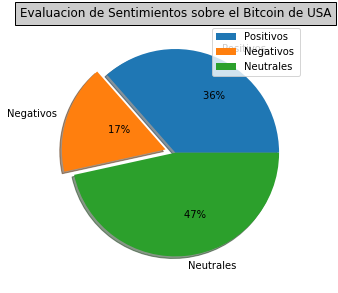

In [45]:
graficar(frecuenciasA,"USA")

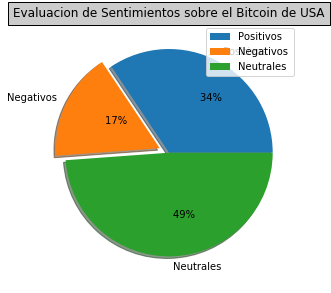

In [46]:
graficar(frecuenciasN,"USA")

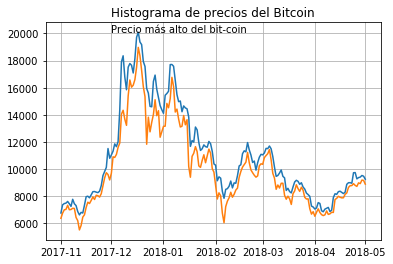

In [47]:
plt.title("Histograma de precios del Bitcoin")
plt.plot(dfjunaug['date'],dfjunaug['high'],dfjunaug['date'],dfjunaug['low'])
plt.grid(True)
plt.text('2017-12-01', dfjunaug['high'].max(),"Precio más alto del bit-coin" )
plt.show()